In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from tools import *

In [109]:
class tree:
    def __init__(self,max_depth=5,min_el=5):
        self.max_depth = max_depth
        self.min_el = min_el
        self.t = {}

    def split(self,data,labels,depth,sub_list_id):
        """ GREEDY BUILD sur le sous-problème (data[sub_list_id], labels[sub_list_id])
            data.shape = (n,d) 
            labels.shape = (n,{-1,1}) """
        
        if (depth==self.max_depth):
            # critère d'arrêt profondeur
            if (np.average(labels[sub_list_id]) > 0):
                return {"p":-1,"val":1}
            return {"p":-1,"val":-1}
        
        # minimisation (quadratique)
        min_split = float('inf')
        min_split_p = 0  # id du point de data où on coupe
        min_split_d = 0  # dimension selon laquelle on coupe
        
        for d in range(data.shape[1]):
            for p in sub_list_id:
                left = []
                right = []
                for q in sub_list_id:
                    if (data[q,d] <= data[p,d]):
                        left.append(q)
                    else:
                        right.append(q)
                
                # calcul impureté du split
                n_left = len(left)
                n_right = len(right)
                p_left = np.sum(labels[left]==1)/n_left
                p_right = np.sum(labels[right]==1)/n_right
                Qm = n_left*p_left*(1-p_left) + n_right*p_right*(1-p_right)
                
                if Qm < min_split:
                    min_split = Qm
                    min_split_p = p
                    min_split_d = d
        
        # ajout pour la coupe trouvée, je ne l'ai pas fait dans la minimisation pour
        # ne pas faire trop de copie de listes
        left = []
        right = []
        for q in sub_list_id:
            if (data[q,min_split_d] <= data[min_split_p,min_split_d]):
                left.append(q)
            else:
                right.append(q)
        
        # ajout dans la structure d'arbre
        if min(len(left),len(right)) <= self.min_el:
            # classe pure
            if (np.average(labels[sub_list_id]) > 0):
                return {"p":-1,"val":1}
            return {"p":-1,"val":-1}
        elif min(len(left),len(right)) <= self.min_el :
            # critère d'arrêt sur sous-nombre de représentant d'une classe
            if (np.average(labels[sub_list_id]) > 0):
                return {"p":-1,"val":1}
            return {"p":-1,"val":-1}
        else:
            return {"p":data[min_split_p][min_split_d],
                    "d":min_split_d,
                    "left":self.split(data,labels,depth+1,left),
                    "right":self.split(data,labels,depth+1,right)}
    
    def build(self,data,labels):
        self.t = self.split(data,labels,0,range(data.shape[0]))
    
    def predict(self,p):
        current_node = self.t
        search = True
        while current_node["p"] != -1:
            if p[current_node["d"]] <= current_node["p"]:
                current_node = current_node["left"]
            else:
                current_node = current_node["right"]
        return current_node["val"]
    
    def plot(self,step=20):
        grid,x,y = make_grid(step=step)
        h = np.zeros(len(grid[:,0]))
        l = np.shape(x)[0]
        x = x.reshape((-1,1))
        y = y.reshape((-1,1))
        for i in range(len(h)):
            h[i] = self.predict([x[i],y[i]])
        plt.matshow(h.reshape((l,-1)),cmap='plasma')
        plt.axis('off')
    
        

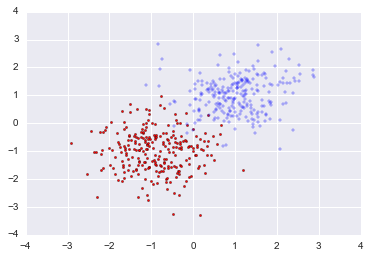

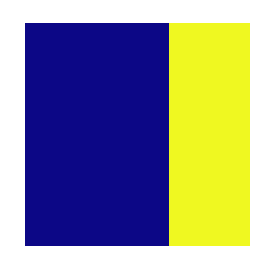

In [115]:
x,y = gen_arti(sigma=0.5,nbex=500,data_type=0)
plot_data(x,y)

t = tree(max_depth=3)
t.build(x,y)

plt.figure()
t.plot(step=100)

In [116]:
t.t

{'d': 0,
 'left': {'p': -1, 'val': -1},
 'p': 1.3926365409653265,
 'right': {'d': 0,
  'left': {'p': -1, 'val': 1},
  'p': 1.6465424414407446,
  'right': {'p': -1, 'val': 1}}}